## Baseline Model Evaluation


## 1. Introduction

In this notebook, we build a baseline model to predict loan approval using Logistic Regression. This gives us a performance benchmark for more advanced models.

We evaluate the model using AUC-ROC, the project's primary metric.


## 2. Train/Test Split

We split the processed dataset into training and test sets using an 80/20 ratio, while preserving the class distribution via stratified sampling.


In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression

In [28]:
# Load Datasets
df = pd.read_csv("data/train_preprocessed.csv")

In [ ]:
# Split Data Into Train and Test Sets
X = df.drop(columns=["loan_status"])
y = df["loan_status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

## 3. Train Logistic Regression (Baseline Model)

We train a Logistic Regression model using the training set. This provides a simple, interpretable reference point for future comparison.


In [ ]:
# Logistic Regression
model = LogisticRegression(random_state=42, solver="liblinear")
model.fit(X_train, y_train)

y_proba = model.predict_proba(X_test)
y_scores = y_proba[:, 1]

auc = roc_auc_score(y_test, y_scores)
print(f"AUC: {auc:.4f}")

AUC: 0.7814


## 4. Evaluate Model Performance

We evaluate the baseline model using AUC-ROC, which measures the model's ability to distinguish between approved and rejected loans.


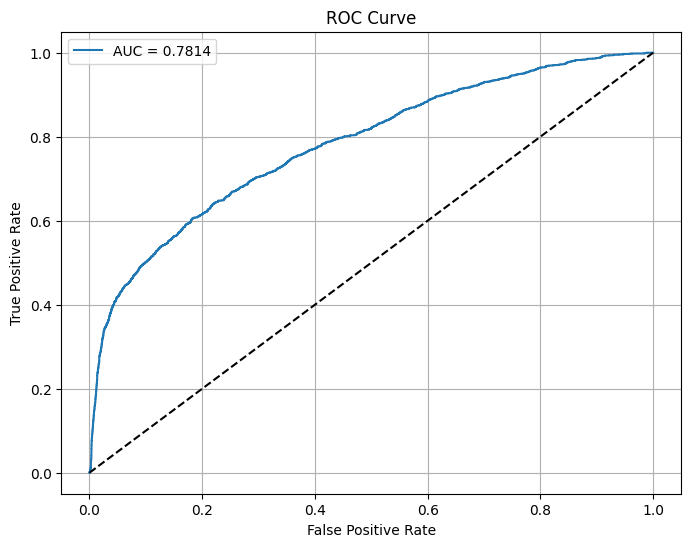

In [ ]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")  
plt.legend() 
plt.grid(True)

## 5. Interpretation and Insights

The baseline model achieved an AUC of **0.7814**, which serves as a reasonable starting point. Although simple, logistic regression is effective in many binary classification settings.

We will aim to improve this performance using more advanced, tree-based models.
